In [1]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [2]:
# def padding (img, dimx, dimy):
#     dimx_zeros = dimx - img.shape[1]
#     dimy_zeros = dimy - img.shape[0]
#     dimx_left = int(dimx_zeros/2)
#     dimx_right = dimx_zeros-dimx_left
#     dimy_top = int(dimy_zeros/2)
#     dimy_down = dimy_zeros-dimy_top

#     img_out = np.zeros((dimy, dimx, img.shape[2]))
#     img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img

#     return img_out


In [3]:
# def corr2d (img, ker):
#     return np.multiply(img, ker).sum()

# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def nonlinear_func(img):
#     return sigmoid(img)

Input img size :  (664, 1000, 3)
######################################################################
output size from the conv_layer :  (132, 199)
ker size :  (10, 10, 3)
stride :  (5, 5)
pad :  valid
kernel :  [[[ 0.7100947   0.80635524  0.70938462]
  [-0.87654874 -0.0862559   0.44091955]
  [-0.4163138   2.30203447  0.59126627]
  [ 2.02027861 -0.27858313  0.79279829]
  [ 1.00337711 -0.55823704  0.28810194]
  [-1.10576598  0.48591703 -0.57728631]
  [ 1.17588388  1.13798932 -0.3884176 ]
  [ 1.4668349   0.49415054 -1.31231869]
  [ 0.19269228 -0.70703195  0.02383044]
  [-0.49121814 -0.04645662  0.19621226]]

 [[ 1.56434185 -0.05593909 -0.92758947]
  [-0.84589803 -0.69431259 -0.74245063]
  [ 0.02636815  0.70174719 -0.80956723]
  [ 0.37940424  0.34981225  0.91964566]
  [-0.50703163 -0.67533921  0.08066292]
  [ 1.5765527   0.03550379  0.26446976]
  [ 0.05521011  1.74260835  1.1797393 ]
  [-0.54017105 -0.49820158 -0.3065766 ]
  [ 0.01607678 -0.93254985  0.54361299]
  [-0.00576528 -0.187871

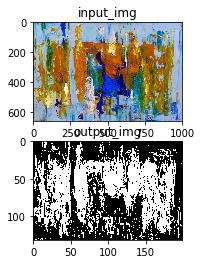

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def padding (img, dimx, dimy):
    dimx_zeros = dimx - img.shape[1]
    dimy_zeros = dimy - img.shape[0]
    dimx_left = int(dimx_zeros/2)
    dimx_right = dimx_zeros-dimx_left
    dimy_top = int(dimy_zeros/2)
    dimy_down = dimy_zeros-dimy_top

    img_out = np.zeros((dimy, dimx, img.shape[2]))
    img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img

    return img_out


def corr2d (img, ker):
    return np.multiply(img, ker).sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def nonlinear_func(img):
    return sigmoid(img)

def conv2d (input_img, ker, bias, nonlinear_func, stride=(1,1), pad='same'):
    img_out = []
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((input_img.shape[0], input_img.shape[1]))
    else:
        if((input_img.shape[0]-ker.shape[0])%stride[0]==0):
            dimy = input_img.shape[0]
        else:
            dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-ker.shape[0])%stride[0]
        if((input_img.shape[1]-ker.shape[1])%stride[1]==0):
            dimx = input_img.shape[1]
        else:
            dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-ker.shape[1])%stride[1]

        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

    ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])

    for iter in range(ker.shape[0]):
        for iter2 in range(ker.shape[1]):
            ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

    ker_rev_y = ker_rev.shape[0]
    ker_rev_x = ker_rev.shape[1]
    for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
        for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
            img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)

    print("######################################################################")
    print("output size from the conv_layer : ", img_out.shape)
    print("ker size : ", ker.shape)
    print("stride : ", stride)
    print("pad : ", pad)
    return nonlinear_func(img_out+bias)

img = cv2.imread('image.png')
ker1 = np.random.normal(size=(10, 10, 3))

shapey = 0
shapex = 0

if (img.shape[0]-ker1.shape[0])%5==0:
    shapey = int((img.shape[0]-ker1.shape[0])/5)+1
else:
    shapey = int((img.shape[0]-ker1.shape[0])/5)+2

if (img.shape[1]-ker1.shape[1])%5==0:
    shapex = int((img.shape[1]-ker1.shape[1])/5)+1
else:
    shapex = int((img.shape[1]-ker1.shape[1])/5)+2

bias = np.random.normal(size=(shapey, shapex))
# print(int((img.shape[0]-ker1.shape[0])/5)+1)

print("Input img size : ",img.shape)

img_out1 = conv2d(img, ker1, bias, nonlinear_func, stride = (5, 5), pad = 'valid')
print("kernel : ", ker1)
plt.subplot(2,1,1)
plt.imshow(img, cmap='gray')
plt.title("input_img")
plt.subplot(2,1,2)
plt.imshow(img_out1.astype(int), cmap = 'gray')
plt.title("output_img")
plt.show()
